In [1]:
import pandas as pd
import numpy as np
import random

## <span style='color:green'>Xploring data set <span>

In [2]:
! ls ./wdi

Country.csv	  database.sqlite  hashes.txt	   Series.csv
CountryNotes.csv  Footnotes.csv    Indicators.csv  SeriesNotes.csv


In [5]:
# START BY CREATING A PANDAS OBJECT
file = pd.read_csv('./wdi/Indicators.csv')
print('shape of file:',file.shape)
file.head(7)

shape of file: (5656458, 6)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01


In [8]:
# an ndarray of countries 
countries = file['CountryName'].unique()
print('total number of countries are:',len(countries))
# countries

total number of countries are: 247


In [11]:
code = file['CountryCode'].unique().tolist()
indicators = file['IndicatorName'].unique().tolist()
len(indicators)

1344

In [14]:
years = file['Year'].unique().tolist()
len(years)

56

## <span style='color:green'> Matplotlib Plotting <span>

### staging data for plotting, pandas use by creating a new pandas data frame of india 

In [22]:
# select CO2 emissions for the India for years 1960-2015
hist_indicator = 'CO2 emissions \(metric'

mask1 = file['IndicatorName'].str.contains(hist_indicator) 
mask2 = file['CountryCode'].str.contains('IND')

# stage is just those indicators matching the India for country code and CO2 emissions over time.
stage = file[mask1 & mask2]
print(type(stage))
stage.head()

<class 'pandas.core.frame.DataFrame'>


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
36513,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.284292
64049,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.306519
92493,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.322533
121290,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.308900


In [24]:
year = stage['Year'].values
print(year)
co2_emmision = stage['Value'].values
co2_emmision

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011]


array([ 0.26816141,  0.28429173,  0.30651947,  0.32253299,  0.30890045,
        0.33333065,  0.33785398,  0.33176343,  0.35328108,  0.35199068,
        0.35227991,  0.3633376 ,  0.37573111,  0.37803131,  0.3819147 ,
        0.40566208,  0.41463812,  0.48498596,  0.47757598,  0.48717449,
        0.49995192,  0.52528402,  0.54555342,  0.57845265,  0.58471409,
        0.62712472,  0.65765096,  0.68714948,  0.72615388,  0.77743382,
        0.79321774,  0.83043356,  0.86449822,  0.88082115,  0.91759788,
        0.9575092 ,  1.02341866,  1.04622354,  1.05461305,  1.10571582,
        1.126421  ,  1.1231051 ,  1.12530101,  1.15657589,  1.19717814,
        1.23315143,  1.29453566,  1.36578685,  1.49788636,  1.61904865,
        1.58486994,  1.66287348])

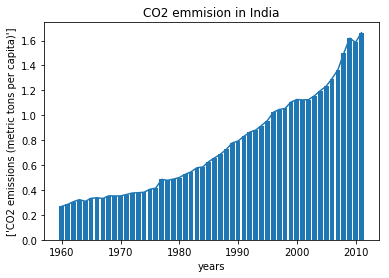

In [38]:
import matplotlib.pyplot as plt
# % inline matplotlib

plt.bar(year,co2_emmision)
plt.title('CO2 emmision in India')
plt.xlabel('years')
plt.ylabel(stage['IndicatorName'].unique())
plt.show()

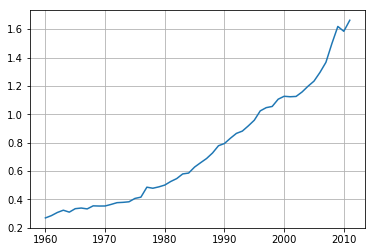

In [41]:
plt.plot(year,co2_emmision)
plt.grid(True)
plt.show()

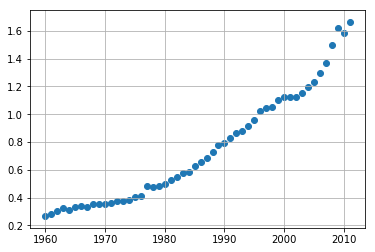

In [45]:
plt.scatter(year,co2_emmision)
plt.grid(True)
plt.show()